# TASK-3 : Credit Card Fraud Detection

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

**Data Collection**

In [80]:
train = pd.read_csv("/content/fraudTrain.csv")
test = pd.read_csv("/content/fraudTest.csv")

data = pd.concat([train, test])
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,535278.000000,5.352780e+05,535277.000000,535277.000000,535277.000000,535277.000000,5.352770e+05,5.352760e+05,535276.000000,535276.000000,535276.000000
mean,133819.001263,4.175962e+17,70.181538,48795.862423,38.541760,-90.212796,8.911310e+04,1.353702e+09,38.541497,-90.212504,0.005967
std,77260.798704,1.309491e+18,154.099161,26873.593715,5.071236,13.741494,3.021462e+05,2.237619e+07,5.106575,13.754095,0.077016
min,0.000000,4.471000e+03,1.000000,1257.000000,20.027100,-165.672300,6.000000e+00,1.325376e+09,19.029798,-166.671575,0.000000
25%,66909.250000,1.800400e+14,9.640000,26237.000000,34.668900,-96.798000,7.430000e+02,1.331764e+09,34.749788,-96.879193,0.000000
50%,133819.000000,3.519607e+15,47.460000,48174.000000,39.371600,-87.461600,2.443000e+03,1.336851e+09,39.367085,-87.421019,0.000000
75%,200728.750000,4.635331e+15,83.230000,72011.000000,41.940400,-80.158000,2.032800e+04,1.375848e+09,41.959483,-80.235377,0.000000
max,267664.000000,4.992346e+18,17897.240000,99783.000000,66.693300,-67.950300,2.906700e+06,1.380366e+09,67.510267,-66.952352,1.000000


In [81]:
print(train.shape)
print(test.shape)

(267665, 23)
(267613, 23)


In [82]:
display(data.head())
print(data.describe())
print(data.isnull().sum())

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


          Unnamed: 0        cc_num            amt            zip  \
count  535278.000000  5.352780e+05  535277.000000  535277.000000   
mean   133819.001263  4.175962e+17      70.181538   48795.862423   
std     77260.798704  1.309491e+18     154.099161   26873.593715   
min         0.000000  4.471000e+03       1.000000    1257.000000   
25%     66909.250000  1.800400e+14       9.640000   26237.000000   
50%    133819.000000  3.519607e+15      47.460000   48174.000000   
75%    200728.750000  4.635331e+15      83.230000   72011.000000   
max    267664.000000  4.992346e+18   17897.240000   99783.000000   

                 lat           long      city_pop     unix_time  \
count  535277.000000  535277.000000  5.352770e+05  5.352760e+05   
mean       38.541760     -90.212796  8.911310e+04  1.353702e+09   
std         5.071236      13.741494  3.021462e+05  2.237619e+07   
min        20.027100    -165.672300  6.000000e+00  1.325376e+09   
25%        34.668900     -96.798000  7.430000e+02  1

In [83]:
test.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time            cc_num  \
0                0   2020-06-21 12:14:25  2291163933867244   
1                1   2020-06-21 12:14:33  3573030041201292   
2                2   2020-06-21 12:14:53  3598215285024754   
3                3   2020-06-21 12:15:15  3591919803438423   
4                4   2020-06-21 12:15:17  3526826139003047   
...            ...                   ...               ...   
267608      267608   2020-09-28 11:03:18  3524574586339330   
267609      267609   2020-09-28 11:03:32  2720433095629877   
267610      267610   2020-09-28 11:05:59      630441765090   
267611      267611   2020-09-28 11:06:08     4500002361389   
267612      267612   2020-09-28 11:06:25  4836998673805450   

                                    merchant        category     amt   first  \
0                      fraud_Kirlin and Sons   personal_care    2.86    Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84  Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28  Ashley   
3                          fraud_Haley Group        misc_pos   60.05   Brian   
4                      fraud_Johnston-Casper          travel    3.19  Nathan   
...                                      ...             ...     ...     ...   
267608                     fraud_Lockman Ltd     grocery_pos  211.50  Ashley   
267609   fraud_Kovacek, Dibbert and Ondricka     grocery_pos   57.04    Mark   
267610     fraud_Schultz, Simonis and Little     grocery_pos  134.39   Susan   
267611                 fraud_Rodriguez Group   gas_transport   57.67  Joseph   
267612                  fraud_Murray-Smitham     grocery_pos  171.81   Susan   

              last gender                        street  ...      lat  \
0          Elliott      M             351 Darlene Green  ...  33.9659   
1         Williams      F              3638 Marsh Union  ...  40.3207   
2            Lopez      F          9333 Valentine Point  ...  40.6729   
3         Williams      M   32941 Krystal Mill Apt. 552  ...  28.5697   
4           Massey      M      5783 Evan Roads Apt. 465  ...  44.2529   
...            ...    ...                           ...  ...      ...   
267608     Cabrera      F  94225 Smith Springs Apt. 617  ...  27.6330   
267609        Wood      M     854 Walker Dale Suite 488  ...  44.0575   
267610  Washington      F      759 Erin Mount Suite 956  ...  31.9571   
267611       Nixon      M  86882 Desiree Camp Suite 047  ...  38.2833   
267612       Hardy      F               516 Brown Parks  ...  46.0062   

            long  city_pop                          job         dob  \
0       -80.9355    333497          Mechanical engineer  1968-03-19   
1      -110.4360       302       Sales professional, IT  1990-01-17   
2       -73.5365     34496            Librarian, public  1970-10-21   
3       -80.8191     54767                 Set designer  1987-07-25   
4       -85.0170      1126           Furniture designer  1955-07-06   
...          ...       ...                          ...         ...   
267608  -80.4031    105638            Librarian, public  1986-05-07   
267609  -69.9656      3224        Engineer, electronics  1997-08-22   
267610  -98.9656      1791  Corporate investment banker  1965-07-26   
267611  -75.8465       470                  Music tutor  1965-04-07   
267612  -86.2555         6                          NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       2da90c7d74bd46a0caf3777415b3ebd3  1.371817e+09  33.986391  -81.200714   
1       324cc204407e99f51b0d6ca0055005e7  1.371817e+09  39.450498 -109.960431   
2       c81755dbbbea9d5c77f094348a7579be  1.371817e+09  40.495810  -74.196111   
3       2159175b9efe66dc301f149d3d5abf8c  1.371817e+09  28.812398  -80.883061   
4       57ff021bd3f328f8738bb535c302a31b  1.371817e+09  44.959148  -85.884734   
...                                  ...      

In [84]:
train.info

<bound method DataFrame.info of         Unnamed: 0 trans_date_trans_time               cc_num  \
0                0   2019-01-01 00:00:18     2703186189652095   
1                1   2019-01-01 00:00:44         630423337322   
2                2   2019-01-01 00:00:51       38859492057661   
3                3   2019-01-01 00:01:16     3534093764340240   
4                4   2019-01-01 00:03:06      375534208663984   
...            ...                   ...                  ...   
267660      267660   2019-05-12 19:42:43  4861310130652566408   
267661      267661   2019-05-12 19:42:54  4044436772018844508   
267662      267662   2019-05-12 19:42:56     4908846471916297   
267663      267663   2019-05-12 19:43:16     6592861994408652   
267664      267664   2019-05-12 19:43:42                 4471   

                                  merchant        category     amt      first  \
0               fraud_Rippin, Kub and Mann        misc_net    4.97   Jennifer   
1          fraud_Heller, Gutmann and Zieme     grocery_pos  107.23  Stephanie   
2                     fraud_Lind-Buckridge   entertainment  220.11     Edward   
3       fraud_Kutch, Hermiston and Farrell   gas_transport   45.00     Jeremy   
4                      fraud_Keeling-Crist        misc_pos   41.96      Tyler   
...                                    ...             ...     ...        ...   
267660                   fraud_Kulas Group  health_fitness   29.34     Ashley   
267661              fraud_Kautzer and Sons   personal_care   24.29        Amy   
267662                  fraud_Botsford Ltd    shopping_pos    5.11     Lauren   
267663     fraud_Ruecker, Beer and Collier    shopping_net    6.07     Ashley   
267664                                 NaN             NaN     NaN        NaN   

             last gender                         street  ...      lat  \
0           Banks      F                 561 Perry Cove  ...  36.0788   
1            Gill      F   43039 Riley Greens Suite 393  ...  48.8878   
2         Sanchez      M       594 White Dale Suite 530  ...  42.1808   
3           White      M    9443 Cynthia Court Apt. 038  ...  46.2306   
4          Garcia      M               408 Bradley Rest  ...  38.4207   
...           ...    ...                            ...  ...      ...   
267660       Cruz      F   65417 Walsh Radial Suite 691  ...  30.2385   
267661     Abbott      F            01505 Amy Stravenue  ...  39.8355   
267662     Torres      F              03030 White Lakes  ...  32.2779   
267663  Whitehead      F  58188 Madison Meadow Apt. 949  ...  42.8112   
267664        NaN    NaN                            NaN  ...      NaN   

            long  city_pop                                job         dob  \
0       -81.1781    3495.0          Psychologist, counselling  1988-03-09   
1      -118.2105     149.0  Special educational needs teacher  1978-06-21   
2      -112.2620    4154.0        Nature conservation officer  1962-01-19   
3      -112.1138    1939.0                    Patent attorney  1967-01-12   
4       -79.4629      99.0     Dance movement psychotherapist  1986-03-28   
...          ...       ...                                ...         ...   
267660  -90.8435   10076.0           Surveyor, rural practice  1977-12-16   
267661  -84.2613  479994.0              Environmental manager  1970-11-09   
267662  -97.2351    5875.0          Radiographer, therapeutic  1992-07-24   
267663  -78.4481    1166.0                Colour technologist  1983-06-12   
267664       NaN       NaN                                NaN         NaN   

                               trans_num     unix_time  merch_lat  merch_long  \
0       0b242abb623afc578575680df30655b9  1.325376e+09  36.011293  -82.048315   
1       1f76529f8574734946361c461b024d99  1.325376e+09  49.159047 -118.186462   
2       a1a22d70485983eac12b5b88dad1cf95  1.325376e+09  43.150704 -112.154481   
3       6b849c168bdad6f867558c3793159a81  1.325376e+09  47.034331 -112.561071   
4      

In [85]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}

label_encode_cols = ['merchant', 'category', 'gender', 'state', 'job']
for col in label_encode_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    train[col] = le.fit_transform(train[col])
    label_encoders[col] = le

    test[col] = le.fit_transform(test[col])
    label_encoders[col] = le

In [86]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])

data['transaction_year'] = data['trans_date_trans_time'].dt.year
data['transaction_month'] = data['trans_date_trans_time'].dt.month
data['transaction_day'] = data['trans_date_trans_time'].dt.day
data['transaction_hour'] = data['trans_date_trans_time'].dt.hour

data['birth_year'] = data['dob'].dt.year
data['birth_month'] = data['dob'].dt.month
data['birth_day'] = data['dob'].dt.day
data.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
train['dob'] = pd.to_datetime(train['dob'])

train['transaction_year'] = train['trans_date_trans_time'].dt.year
train['transaction_month'] = train['trans_date_trans_time'].dt.month
train['transaction_day'] = train['trans_date_trans_time'].dt.day
train['transaction_hour'] = train['trans_date_trans_time'].dt.hour

train['birth_year'] = train['dob'].dt.year
train['birth_month'] = train['dob'].dt.month
train['birth_day'] = train['dob'].dt.day

train.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

test['trans_date_trans_time'] = pd.to_datetime(test['trans_date_trans_time'])
test['dob'] = pd.to_datetime(test['dob'])

test['transaction_year'] = test['trans_date_trans_time'].dt.year
test['transaction_month'] = test['trans_date_trans_time'].dt.month
test['transaction_day'] = test['trans_date_trans_time'].dt.day
test['transaction_hour'] = test['trans_date_trans_time'].dt.hour
test['birth_year'] = test['dob'].dt.year
test['birth_month'] = test['dob'].dt.month
test['birth_day'] = test['dob'].dt.day

test.drop(['trans_date_trans_time', 'dob'], axis=1, inplace=True)

In [87]:
data.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
train.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)
test.drop(['first', 'last', 'street', 'city', 'trans_num'], axis=1, inplace=True)

In [88]:
print(train.shape)
print(test.shape)
print(data.shape)

(267665, 23)
(267613, 23)
(535278, 23)


In [89]:
print(data.head(0))
print(data.head())
print(data.describe())
print(data.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, cc_num, merchant, category, amt, gender, state, zip, lat, long, city_pop, job, unix_time, merch_lat, merch_long, is_fraud, transaction_year, transaction_month, transaction_day, transaction_hour, birth_year, birth_month, birth_day]
Index: []

[0 rows x 23 columns]
   Unnamed: 0            cc_num  merchant  category     amt  gender  state  \
0           0  2703186189652095       514         8    4.97       0     27   
1           1      630423337322       241         4  107.23       0     47   
2           2    38859492057661       390         0  220.11       1     13   
3           3  3534093764340240       360         2   45.00       1     26   
4           4   375534208663984       297         9   41.96       1     45   

       zip      lat      long  ...  merch_lat  merch_long  is_fraud  \
0  28654.0  36.0788  -81.1781  ...  36.011293  -82.048315       0.0   
1  99160.0  48.8878 -118.2105  ...  49.159047 -118.186462       0.0   
2  83252.0  42.1

In [90]:
data = data.reset_index(drop=True)

In [91]:
data = data.drop_duplicates()

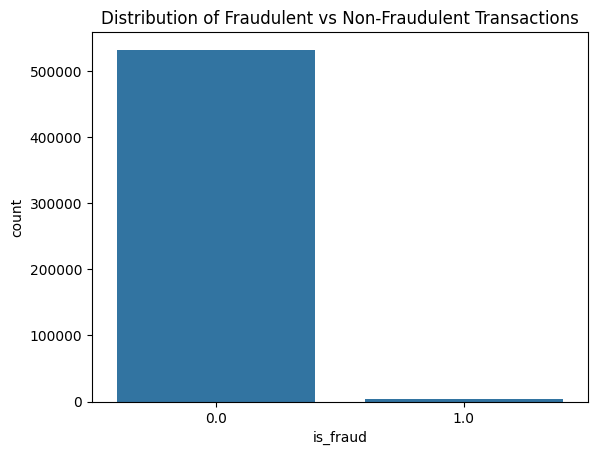

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='is_fraud')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

In [93]:
print(data.index.duplicated().sum())
data = data.reset_index(drop=True)
print(data.index.duplicated().sum())

0
0


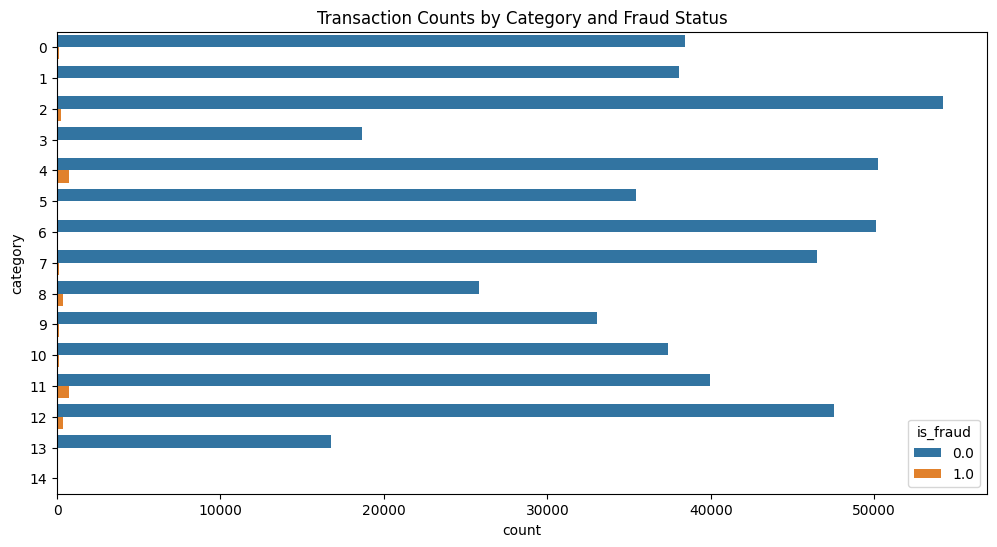

In [94]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='category', hue='is_fraud')
plt.title('Transaction Counts by Category and Fraud Status')
plt.xticks(rotation=0)
plt.show()

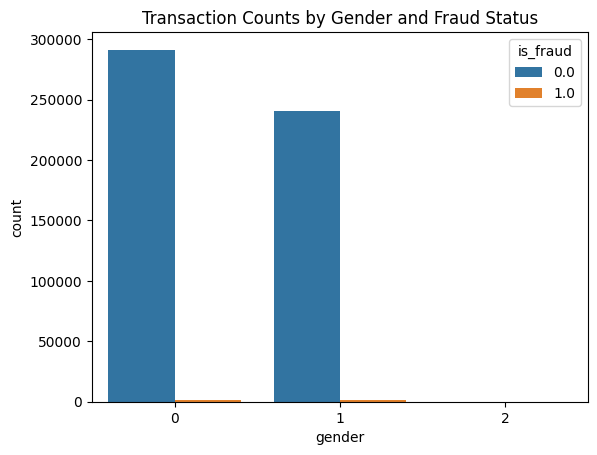

In [95]:
## The 0 represent male and 1 represent female
sns.countplot(data=data, x='gender', hue='is_fraud')
plt.title('Transaction Counts by Gender and Fraud Status')
plt.show()

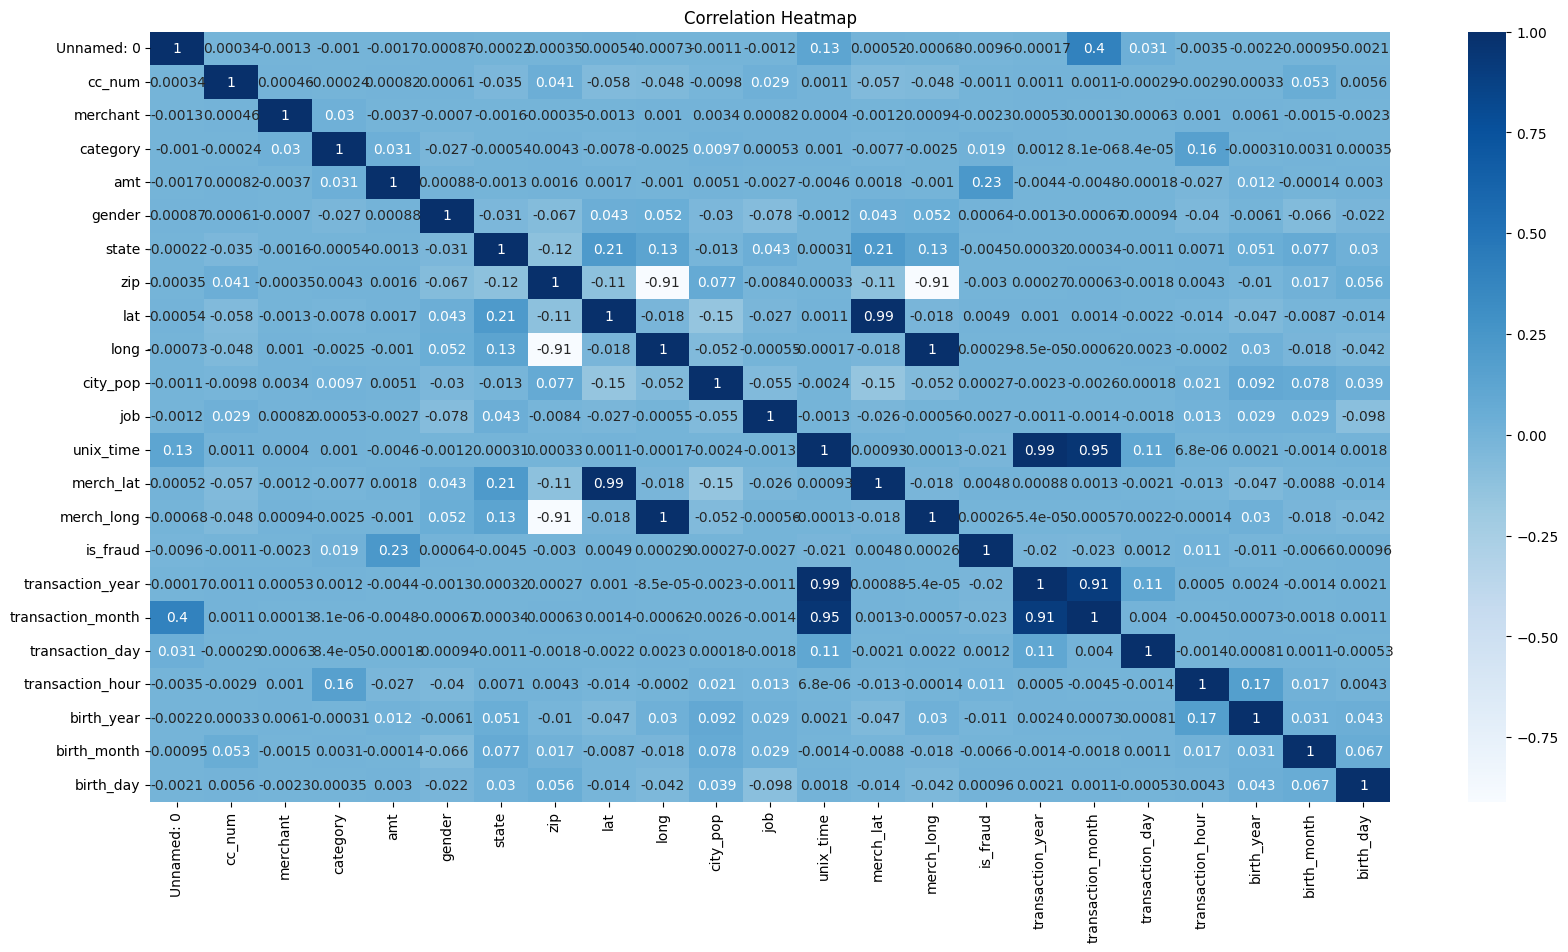

In [96]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [97]:
data  = data.dropna()

X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
# Training the model for logisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    106443
         1.0       0.00      0.00      0.00       613

    accuracy                           0.99    107056
   macro avg       0.50      0.50      0.50    107056
weighted avg       0.99      0.99      0.99    107056

[[106443      0]
 [   613      0]]
Accuracy: 0.9942740248094455


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
# Training the model with DecisionTreeClassifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    106443
         1.0       0.77      0.81      0.79       613

    accuracy                           1.00    107056
   macro avg       0.88      0.90      0.89    107056
weighted avg       1.00      1.00      1.00    107056

[[106292    151]
 [   117    496]]
Accuracy: 0.9974966372739501


In [100]:
# Training the model with logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    106443
         1.0       0.00      0.00      0.00       613

    accuracy                           0.99    107056
   macro avg       0.50      0.50      0.50    107056
weighted avg       0.99      0.99      0.99    107056

[[106443      0]
 [   613      0]]
Accuracy: 0.9942740248094455


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
